In [147]:
from utils import start_notebook
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier,XGBRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [114]:
full_data = pd.read_parquet("datasets/tratados/base_completa.parquet")

<AxesSubplot: xlabel='MD_NOTA_TOTAL', ylabel='Count'>

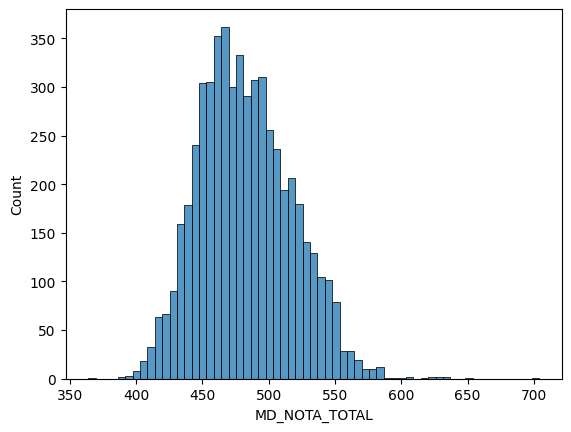

In [115]:
sns.histplot(full_data, x="MD_NOTA_TOTAL")

In [116]:
# removendo outliers
full_data = full_data.query(" MD_NOTA_TOTAL > 400 & MD_NOTA_TOTAL < 560")

<AxesSubplot: xlabel='MD_NOTA_TOTAL', ylabel='Count'>

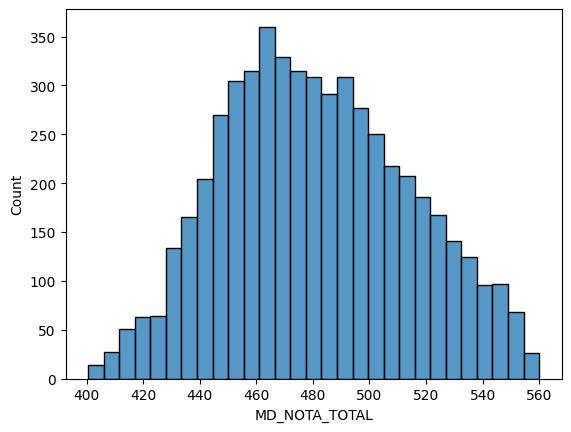

In [117]:
#plotando o histograma após retiradad e outliers
sns.histplot(full_data, x="MD_NOTA_TOTAL")

In [118]:
full_data.columns

Index(['CO_MUNICIPIO', 'PERC_TP_DEPENDENCIA', 'PERC_TP_LOCALIZACAO',
       'PERC_IN_AGUA_POTAVEL', 'PERC_IN_ENERGIA_INEXISTENTE',
       'PERC_IN_ESGOTO_REDE_PUBLICA', 'PERC_IN_BIBLIOTECA_SALA_LEITURA',
       'PERC_IN_QUADRA_ESPORTES', 'PERC_IN_SALA_ESTUDIO_DANCA',
       'PERC_IN_INTERNET', 'PERC_TP_ATIVIDADE_COMPLEMENTAR',
       'SUM_QT_SALAS_UTILIZADAS', 'SUM_QT_DESKTOP_ALUNO',
       'SUM_QT_COMP_PORTATIL_ALUNO', 'MD_NOTA_TOTAL'],
      dtype='object')

In [119]:
full_data = full_data.drop(["CO_MUNICIPIO"], axis =1)

<AxesSubplot: xlabel='MD_NOTA_TOTAL', ylabel='Count'>

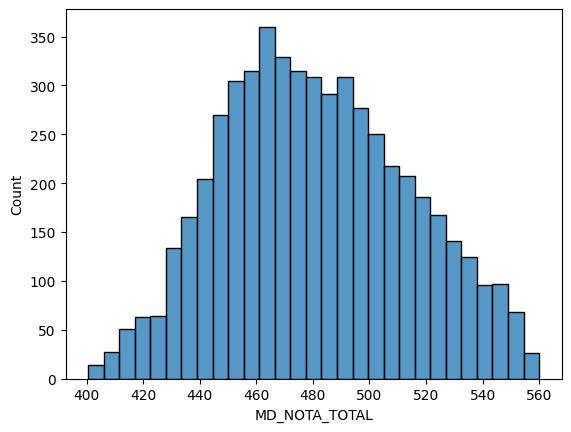

In [120]:
sns.histplot(full_data, x="MD_NOTA_TOTAL")

<AxesSubplot: >

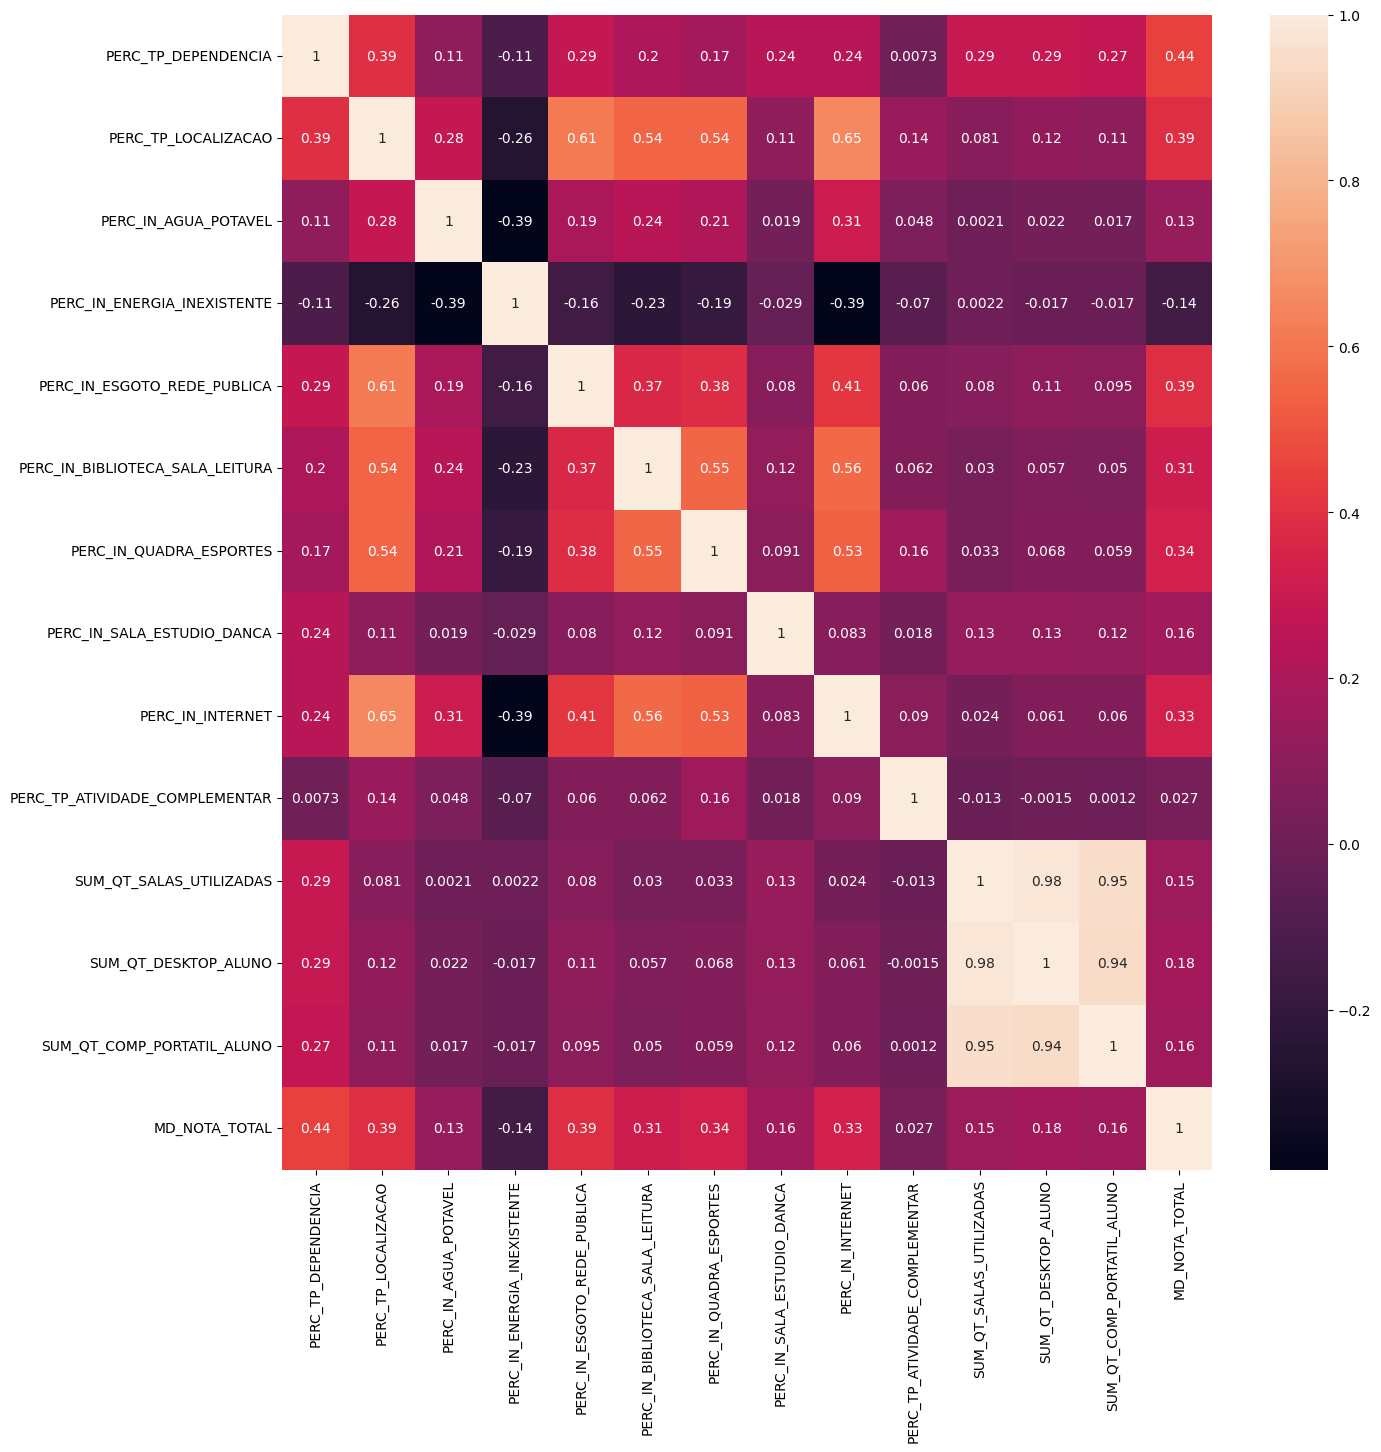

In [121]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(full_data.corr(), annot=True, ax=ax)

In [122]:
full_data = full_data.drop(["SUM_QT_DESKTOP_ALUNO", "SUM_QT_COMP_PORTATIL_ALUNO"], axis = 1)

In [123]:
# pegando 90% dos dados para treinar e 10% para validar no final.
train_data = full_data.sample(frac=0.9, random_state=42)
valid_data = full_data.loc[~full_data.index.isin(train_data.index)]


In [124]:
train_data.columns

Index(['PERC_TP_DEPENDENCIA', 'PERC_TP_LOCALIZACAO', 'PERC_IN_AGUA_POTAVEL',
       'PERC_IN_ENERGIA_INEXISTENTE', 'PERC_IN_ESGOTO_REDE_PUBLICA',
       'PERC_IN_BIBLIOTECA_SALA_LEITURA', 'PERC_IN_QUADRA_ESPORTES',
       'PERC_IN_SALA_ESTUDIO_DANCA', 'PERC_IN_INTERNET',
       'PERC_TP_ATIVIDADE_COMPLEMENTAR', 'SUM_QT_SALAS_UTILIZADAS',
       'MD_NOTA_TOTAL'],
      dtype='object')

<AxesSubplot: xlabel='MD_NOTA_TOTAL', ylabel='Count'>

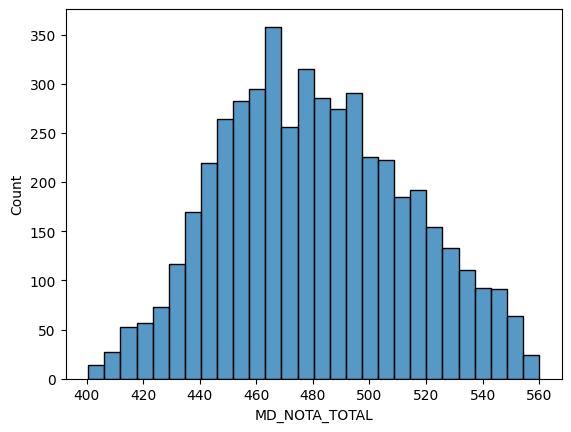

In [125]:
sns.histplot(data=train_data, x = "MD_NOTA_TOTAL")

<AxesSubplot: xlabel='MD_NOTA_TOTAL', ylabel='Count'>

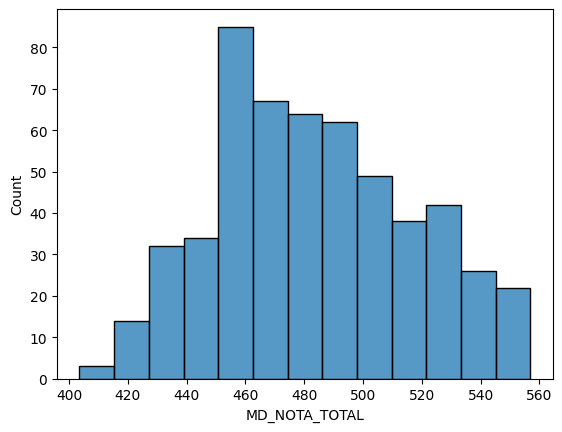

In [126]:
sns.histplot(data=valid_data, x = "MD_NOTA_TOTAL")

In [127]:
print(f"len full data {len(full_data)}")
print(f"len train data {len(train_data)} ")
print(f"len train data {len(valid_data)} ")

len full data 5382
len train data 4844 
len train data 538 


In [130]:
train_data

,PERC_TP_DEPENDENCIA,PERC_TP_LOCALIZACAO,PERC_IN_AGUA_POTAVEL,PERC_IN_ENERGIA_INEXISTENTE,PERC_IN_ESGOTO_REDE_PUBLICA,PERC_IN_BIBLIOTECA_SALA_LEITURA,PERC_IN_QUADRA_ESPORTES,PERC_IN_SALA_ESTUDIO_DANCA,PERC_IN_INTERNET,PERC_TP_ATIVIDADE_COMPLEMENTAR,SUM_QT_SALAS_UTILIZADAS
3316,0.000000,100.000000,100.000000,0.00000,100.000000,80.000000,60.000000,0.000000,100.000000,20.000000,48.0
909,2.777778,27.777778,100.000000,0.00000,23.611111,59.722222,37.500000,0.000000,86.111111,55.555556,317.0
4655,0.000000,60.000000,100.000000,0.00000,20.000000,80.000000,40.000000,0.000000,100.000000,0.000000,25.0
3514,25.000000,95.833333,95.833333,0.00000,91.666667,54.166667,58.333333,0.000000,100.000000,12.500000,217.0
319,0.000000,77.777778,100.000000,0.00000,55.098465,77.777778,22.222222,0.000000,100.000000,11.111111,60.0
...,...,...,...,...,...,...,...,...,...,...,...
1686,0.000000,50.000000,62.500000,0.00000,62.500000,25.000000,12.500000,0.000000,100.000000,12.500000,45.0
501,0.000000,25.000000,100.000000,0.00000,55.098465,41.666667,20.833333,0.000000,66.666667,16.666667,114.0
4975,12.500000,79.166667,95.833333,0.00000,8.333333,58.333333,41.666667,4.166667,100.000000,8.333333,211.0
1863,19.047619,61.904762,71.428571,9.52381,71.428571,52.380952,57.142857,0.000000,95.238095,0.000000,158.0


In [131]:
y = train_data["MD_NOTA_TOTAL"]
train_data = train_data.drop(["MD_NOTA_TOTAL"], axis = 1)


KeyError: 'MD_NOTA_TOTAL'

In [132]:
x = train_data.copy()

In [133]:
kf = KFold(n_splits= 5, shuffle=True, random_state=42, )
cnt = 1
for train_index, test_index in kf.split(x,y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 3875, Test set:969
Fold:2, Train set: 3875, Test set:969
Fold:3, Train set: 3875, Test set:969
Fold:4, Train set: 3875, Test set:969
Fold:5, Train set: 3876, Test set:968


In [134]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [135]:
score = cross_val_score(linear_model.LinearRegression(), x, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-724.17521664 -782.80347421 -775.03582089 -776.7061861  -704.28448169]
rmse= 27.43


In [136]:
score = cross_val_score(ensemble.RandomForestRegressor(random_state= 42), x, y, cv= kf, scoring="neg_mean_squared_error", )
print(f'Scores for each fold are: {score}')
rmse(score.mean())


Scores for each fold are: [-693.02993937 -737.54645682 -732.89359804 -717.46626784 -678.82046678]
rmse= 26.68


In [137]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

In [138]:
xgbr = xgb.XGBRegressor(seed = 20)

In [139]:
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=100,
                         verbose=1,
                         n_jobs=-1)

In [141]:
clf.fit(x,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/wagner/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 6, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='neg_mean_squared_error', verbose=1)

In [149]:
best_xgb = clf.best_estimator_

In [156]:
x_valid, y_valid = (valid_data.iloc[:,:-1], valid_data.iloc[:,-1])

In [164]:
y_predicted = best_xgb.predict(x_valid)

In [165]:
mse = mean_squared_error(y_valid, y_predicted)

In [167]:
mse**(1/2)

25.40104385674488

In [168]:
clf.best_params_

{'subsample': 0.7999999999999999,
 'n_estimators': 1000,
 'max_depth': 3,
 'learning_rate': 0.01,
 'colsample_bytree': 0.4,
 'colsample_bylevel': 0.8999999999999999}

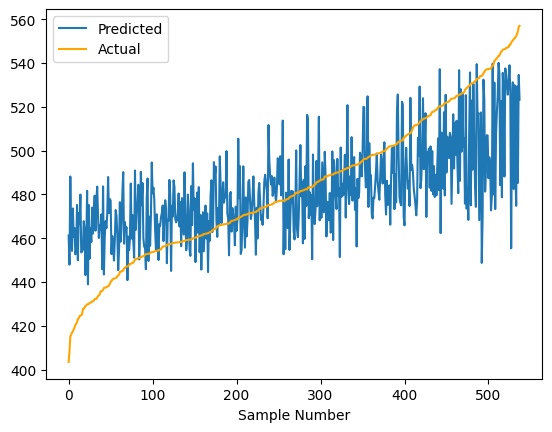

In [184]:
target = pd.Series(y_valid).reset_index(drop=True).sort_values()
predictions = pd.Series(y_predicted)
predictions = predictions.iloc[target.index].reset_index(drop=True)
target = target.reset_index(drop=True)
plt.plot(predictions, label='Predicted')
plt.plot(target, label='Actual', color='orange')
plt.legend(['Predicted', 'Actual'])
plt.xlabel('Sample Number')
plt.show()

In [202]:
features =  [[key, value] for key, value in best_xgb.get_booster().get_score(importance_type="gain").items() ]
features = pd.DataFrame(features, columns=["Variavel", "importancia"])
features = features.sort_values(["importancia"], ascending=False)
features


,Variavel,importancia
0,PERC_TP_DEPENDENCIA,22751.445312
4,PERC_IN_ESGOTO_REDE_PUBLICA,20918.789062
10,SUM_QT_SALAS_UTILIZADAS,15493.189453
6,PERC_IN_QUADRA_ESPORTES,10644.326172
1,PERC_TP_LOCALIZACAO,9927.051758
5,PERC_IN_BIBLIOTECA_SALA_LEITURA,8597.077148
7,PERC_IN_SALA_ESTUDIO_DANCA,7839.082031
8,PERC_IN_INTERNET,5264.391113
9,PERC_TP_ATIVIDADE_COMPLEMENTAR,4903.759277
2,PERC_IN_AGUA_POTAVEL,2356.984131
